# Python to JavaScript tips

### Print is a jupyter demonstration function only -- not for pavlovia

In [5]:
%%HTML
<script>
current_cell = undefined;
function print(...value) {
    //# get the currently running cell:
    var outers = document.getElementsByClassName("cell code_cell rendered running")[0];
    //# the area into which text will be printed:
    var print_space = outers.getElementsByClassName("output_subarea output_html rendered_html")[0];
    //# make the current cell empty the first time you print to it.
    if (!current_cell || current_cell != print_space){
        current_cell = print_space;
        print_space.innerHTML = "";
    }
    //# add the text to a new line with div:
    print_space.innerHTML += ("<div>"+value+"</div>").replaceAll(", ", ",").replaceAll(",", ", ").replaceAll("\n", "</div><div>");
    //print_space.innerHTML = "";  
}
print("Hello Jupyter Cell");
</script>

In [6]:
%%HTML
<script>
function print_dict_arr(d) {
    //# get the currently running cell:
    var outers = document.getElementsByClassName("cell code_cell rendered running")[0];
    //# the area into which text will be printed:
    var print_space = outers.getElementsByClassName("output_subarea output_html rendered_html")[0];
    //# make the current cell empty the first time you print to it.
    if (!current_cell || current_cell != print_space){
        current_cell = print_space;
        print_space.innerHTML = "";
    }
    keys = Object.keys(d);
    print(keys);
        
    key = keys[0];
    rows = d[key].length;
    range(rows).forEach(function(i){
        print_space.innerHTML += "<div>"
        keys.forEach(function(key, k) {
            //# add the text to a new line with div:
            print_space.innerHTML += d[key][i];
            if (k<keys.length-1){
                print_space.innerHTML += ",";
            }
        });
        print_space.innerHTML += "<div>";
        print_space.innerHTML = print_space.innerHTML.replaceAll(", ", ",").replaceAll(",", ", ").replaceAll("\n", "</div><div>");
    });   
}
d = {"a":[1,2,3,4], "b":[5,6,7,8]}
print_dict_arr(d);
</script>

# PsychoPy to Pavlovia conversions made easy

## Helper functions

In [7]:
%%HTML
<script>
//# because Pavlovia doesn't auto convert append or extend to push, 
//#  make the same functions work for any javascript array by affecting the prototype
Array.prototype.append = Array.prototype.push
Array.prototype.extend = function(arr) {this.push(...arr)};

arr = [1,2,3,4]
arr.append(5)
print(arr)
arr.extend([6,7,8])
print(arr)
</script>

In [8]:
def unpack_example(a,b="Nothing",c="Nothing"):
    print(a)
    print(b)
    print(c)
    
arr = [1,2,3]
unpack_example(*arr)

def print_all(*arguments):
    print(arguments)
    print(*arguments)
print_all(1,2,3)

1
2
3
(1, 2, 3)
1 2 3


In [9]:
%%HTML
<script>
//# how to format a class so that Pavlovia will accept it.
//#  can convert the quest plus class to this 
//#  format to make it work in Pavlovia without pasting it after export.
A = class {
    constructor(name) {
        this.name = name;
    }
    func(replace_name) {
        this.name = replace_name;
    }
}

a = new A("my name");
print(a.name)
a.func("new name");
print(a.name)
</script>

In [10]:
%%HTML
<script>
//# avoid using the "function name(){}" syntax
//#  to account for Pavlovia's scope problems.
range = function(start_stop, post_stop, step=1) {
    //# create a list sequence with a starting point, stopping point, and step size
    //#  the step size is assumed 1 if not provided
    //#  the first value is considered the stopping point if the second value is not given,
    //#   in which case the starting point is assumed to be 0.
    //#  post_stop is the non-inclusive end point.
    var arr = [];
    if (post_stop != undefined) {
        if (post_stop < start_stop) {
            for (var i = start_stop; i > post_stop; i+=step) {
                arr.push(i);
            }
        } else {
            for (var i = start_stop; i < post_stop; i+=step) {
                arr.push(i);
            }
        }
    } else {
        if (start_stop < 0) {
            for (var i = 0; i > start_stop; i+=step) {
                arr.push(i);
            }
        } else {
            for (var i = 0; i < start_stop; i+=step) {
                arr.push(i);
            }
        }       
    }
    return arr;
}

round = function(value, decimals) {
    //# JavaScript's Math.round() doesn't normally
    //#  allow you to specify how many decimals you want!
    var tmp = Math.pow(10, decimals);
    return Math.round(value*tmp)/tmp;
}

arange = function(start_stop, post_stop, step=1, rounding=2) {
    //# same as range(), but with rounding built-in
    //# create a list sequence with a starting point, stopping point, and step size
    //#  the step size is assumed 1 if not provided
    //#  the first value is considered the stopping point if the second value is not given,
    //#   in which case the starting point is assumed to be 0.
    //#  post_stop is the non-inclusive end point.
    var arr = [];
    if (post_stop != undefined) {
        if (post_stop < start_stop) {
            for (var i = start_stop; round(i,rounding) > post_stop; i+=step) {
                arr.push(round(i,rounding));
            }
        } else {
            for (var i = start_stop; round(i,rounding) < post_stop; i+=step) {
                arr.push(round(i,rounding));
            }
        }
    } else {
        if (start_stop < 0) {
            for (var i = 0; round(i,rounding) > start_stop; i-=step) {
                arr.push(round(i,rounding));
            }
        } else {
            for (var i = 0; round(i,rounding) < start_stop; i+=step) {
                arr.push(round(i,rounding));
            }
        }
        
    }
    return arr;
}


clone = function(arr) {
    //# a recursive function that deep copies arrays and dictionaries    
    var loops, tmp;
    //# see if it is an array
    //#  check a couple of things to try to avoid objects with these keys
    if (Array.isArray(arr)) {
        loops = arr;
        tmp = [];
    } else {
        loops = Object.keys(arr);
        tmp = {};
    }
    loops.forEach(function(val){
        var value;
        //# if the looped items are the array, push() to a list
        if (loops === arr) {
            value = val;
            if (typeof(value) == "object") {
                //# if the subelement is another complex object, 
                //#  then clone it as well.
                tmp.push(clone(value));
            } else {
                tmp.push(value);
            }
        } else { //# if the looped items are the dictionary
                 //#  add them with the key
            value = arr[val];
            if (typeof(value) == "object") {
                //# if the subelement is another complex object, 
                //#  then clone it as well.
                tmp[val] = clone(value);
            } else {
                tmp[val] = value;
            }
        }
    })
    return tmp;
}

//# assumes start of 0 and step size of 1,
//#  and ends before 10
print("assumed start: 0, stop: 10, assumed step: 1")
print(range(10));
//# start of 5, end of 10, but assumes step size of 1.
print("start: 5, stop: 10, assumed step: 1")
print(range(5,10));
//# start of 0, end of 10, step size of 3.
print("start: 0, stop: 10, step: 3")
print(range(0,10,3));
//# includes float support, but doesn't 
//#  round or have as high floating point precision 
//#  like python's np.arange()
print("Floating point steps")
print(range(0,10.01,.5));
print(range(0,1.01,.1));
print("Rounded floating point step")
print(arange(0,1.01,.05, 2));

</script>

In [11]:
%%HTML
<script>
//# contains useful random number generation functions.
random = {"random": function(start_stop=1, post_stop=undefined, count=1) {
                var results = [];
                range(count).forEach(function(){
                  //# Math.random() never gives exactly 1, so it
                  //#  never reaches the provided max value.
                  if (post_stop != undefined) {
                      if (post_stop < start_stop) {
                          var tmp = post_stop;
                          post_stop = start_stop;
                          start_stop = tmp;
                      }
                      results.push((start_stop+Math.random()*(post_stop-start_stop)));
                  } else {
                      //# if post_stop is not defined, start_stop is the non-inclusive max value.
                      results.push((Math.random()*start_stop));
                  }
                });
                if (count == 1)
                    return results[0];
                return results;       
          }, 
          
          "randint":function(start_stop, post_stop, count=1){
                var results = [];
                range(count).forEach(function(){
                  //# Math.random() never gives exactly 1, so it
                  //#  never reaches the provided max value.
                  if (post_stop != undefined) {
                      if (post_stop < start_stop) {
                          var tmp = post_stop;
                          post_stop = start_stop;
                          start_stop = tmp;
                      }
                      results.push(parseInt(start_stop+Math.random()*(post_stop-start_stop)));
                  } else {
                      //# if post_stop is not defined, start_stop is the non-inclusive max value.
                      results.push(parseInt(Math.random()*start_stop));
                  }
                });
                if (count == 1)
                    return results[0];
                return results;
          },
          
          "choice":function(arr, count=1, with_replacement=true){
                var results = [];
                if (with_replacement) {
                    range(count).forEach(function(){
                        results.push(arr[random.randint(arr.length)]);
                    });
                } else {
                    //# make a shallow copy to choose from.
                    //#  you can always clone the returned result if you want unique copies,
                    //#  and it makes no difference for arrays of primitives 
                    //#  (like numeric indices or string keys).
                    var tmp = [...arr];//clone(arr);
                    console.log(tmp);
                    range(count).forEach(function(){
                        if (tmp.length == 0)
                            //# refill the array
                            tmp = [...arr];//clone(arr);
                        results.push(tmp.splice(random.randint(tmp.length),1));
                    });
                }
                if (count == 1)
                    return results[0];
                return results;
          }
}

arr = [1,2,3,4,5];
print("5 Random floats in the space [0,1)")
print(random.random(0,1,5));
print("5 Random floats in the space [5,10)")
print(random.random(5,10,5));
print("5 Random integers in the space [5,10)")
print(random.randint(5,10, 5));
print("5 Random choices with replacement")
print(random.choice(arr, 5));
print("5 Random choices without replacement")
print(random.choice(arr, 5, false));
//# causes repeats only after the array is depleted.
print("Random choices without replacement, exceeding the size of the array")
print(random.choice(arr, arr.length*2, false));
</script>

# --Jumping from Python to JavaScript--

## For Each Loops
JavaScript's for loops are usually very different than Python's, but there are ways to make them do very similar things.

In [12]:
# loops through list/array contents
# python's range function is a generator, rather than a list
arr = list(range(1,6))
for value in arr:
    print(value)

# same as:
for i in range(len(arr)):
    print(arr[i])

1
2
3
4
5
1
2
3
4
5


In [13]:
%%HTML
<script>
arr = range(1,6);
//# this JavaScript for loop version looks silly, but has 
//#  fewer places to make mistakes, and
//#  is the more generically useful of the two forms.
arr.forEach(function(value) {
    print(value);
});

//# same as above, but more settings:
//# there are controls for starting point; stopping point; and step size (i++ is the same as i+=1)
for (var i=0; i < arr.length; i++) {
    print(arr[i]);
}
</script>

## Scope and complex forEach examples

In [14]:
# loops through list/array contents while also enumerating to get index
arr = list(range(1,6))
for i,value in enumerate(arr):
    print("index:", i, " value:", value, " arbitrary indexing:", arr[0])

# "scope" refers to the space in which a variable is declared.
#  indentations past each ':' for functions, conditionals, and loops are different scopes 
#  and can declare separate variables with the same names without affecting each other.

def scope_demoA():
    # JavaScript assumes a variable is global unless told otherwise.
    # Python assumes a variable is local unless told otherwise.    
    # by default, a variable is local to this Python function 
    #  and not affected the outer, global arr:
    arr = [4,3,2,1]
    return arr

def scope_demoB():
    # this is how to make a variable global to this Python function 
    #  and affect the outer, global arr:
    global arr # this must be the first real line of code in the function!
    
    arr = [4,3,2,1]
    return arr

print("Locally change Arr")
print(scope_demoA())
print("Unchanged:")
print(arr)
print("Globally change Arr")
print(scope_demoB())
print("Changed:")
print(arr)

index: 0  value: 1  arbitrary indexing: 1
index: 1  value: 2  arbitrary indexing: 1
index: 2  value: 3  arbitrary indexing: 1
index: 3  value: 4  arbitrary indexing: 1
index: 4  value: 5  arbitrary indexing: 1
Locally change Arr
[4, 3, 2, 1]
Unchanged:
[1, 2, 3, 4, 5]
Globally change Arr
[4, 3, 2, 1]
Changed:
[4, 3, 2, 1]


In [15]:
%%HTML
<script>
arr = range(1,6);
arr.forEach(function(value, i) {
    print("index: "+ i, " value: "+ value, " arbitrary indexing: "+arr[0])
});
print("Strict scope pedantry")
//# the previous scope technially already defines arr, 
//#  but there is an optional 3rd parameter that can be declareed explicitly
//#  with very complex code with many scopes.

//# "scope" refers to the space in which a variable is declared.
//#  each set of {}'s for functions, conditionals, and loops are different scopes 
//#  and can declare separate variables with the same names without influencing each other.

//#  Pavlovia handles declarations of global variables in the background, 
//#   so only declare variables in builder with "var" if used in a function where it should be separate
arr.forEach(function(value, i, arr_scope_name) {
    print("index: "+ i, " value: "+ value, " arbitrary indexing: "+arr_scope_name[0])
});

function scope_demoA(){
    //# JavaScript assumes a variable is global unless told otherwise.
    //# Python assumes a variable is local unless told otherwise.
    
    //# this is how you make a variable local to this JavaScript function 
    //#  and not affect the outer, global arr:
    var arr = [4,3,2,1];
    return arr;
}
function scope_demoB(){
    arr = [5,4,3,2];
    return arr;
}
//# scope demo A's "arr" doesn't override the global arr
print("Locally change Arr")
print(scope_demoA());
print("Unchanged:")
print(arr);

//# scope demo B's "arr" does override the global arr
print("Globally change Arr")
print(scope_demoB());
print("Changed:")
print(arr);

</script>

# Dictionaries

In [16]:
d = {'a':1, 'b':2, 'c':3}
for key in d:
    # do something with each key, including accessing the dictionary
    print(key+",", d[key])

a, 1
b, 2
c, 3


In [17]:
%%HTML
<script>
//# dictionary's rough equivalent is an Object:
d = {'a':1, 'b':2, 'c':3}
//# get list of dictionary keys from Object named 'd'
keys = Object.keys(d);
//# do something with each key, including accessing the dictionary
keys.forEach(function(key) {
    print(key, " "+d[key]);
});
</script>

# List comprehension

In [18]:
# minimum requirements of list comprehension: construct an array based on 
#  an expression that gives a value (left side) and a loop (right side)
p = [i*i for i in range(1, 10)]
print("The resulting list from a list comprehension containing squared values from 1 to 9")
print(p)

The resulting list from a list comprehension containing squared values from 1 to 9
[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [19]:
%%HTML
<script>
//# empty array to build on
p = [];
//# add values to array with the push() function
range(1, 10).forEach(function(i){p.push(i*i)});
print("The resulting list from a list comprehension containing squared values from 1 to 9")
print(p);

</script>

In [20]:
%%HTML
<script>
//# empty array to build on
sv = [];
pre_existing = random.randint(1, 51, 72);
alpha = 1.1;
beta = 0.5;
probability = .5;
ambiguity = 0;
//# add values to array with the push() function
pre_existing.forEach(function(money){sv.push((probability - beta*ambiguity/2)*Math.pow(money, alpha))});
print(sv);

</script>

# List comprehension with conditionals

In [21]:
# conditional list comprehension adds a conditional statement to 
#  whether the expression should be added to the new list.
p = [i*i for i in range(1, 10) if i%2==0]
print("Only even values squared and kept in a list comprehension")
print(p)

Only even values squared and kept in a list comprehension
[4, 16, 36, 64]


In [22]:
%%HTML
<script>
//# empty array to build on
p = [];
//# if there is exactly one line 'underneath': 
//#  (like in this example and all python list comprehensions), 
//#  then the if statement does not need to add extra brackets.
//# add values to array with the push() function.
range(1, 10).forEach(function(i){if(i%2==0) p.push(i*i)});
print("Only even values squared and kept in a list comprehension")
print(p);

</script>

## Copying 1-dimensional arrays of primitives

In [23]:
arr = [1,2,3,4,5]
# lists and dictionaries are stored by _reference_ 
#  to the real content in memory, 
#  so errors like this don't make copies of contents, 
#  just the reference to the same content.
bad_copy = arr
# if contents are primitive (e.g., numbers and strings)
#  you can place them all into a new list with the unpacking operator '*'
arr_copy = [*arr]
arr_copy[0] = 5

print("Correctly copied contents modified separately:")
print(arr_copy)
print("Original contents not modified by a good copy:")
print(arr)
# IMPORTANT: using copies of a reference affects the original contents
bad_copy[0] = 0
print("Original contents modified by a bad copy.")
print(arr)

Correctly copied contents modified separately:
[5, 2, 3, 4, 5]
Original contents not modified by a good copy:
[1, 2, 3, 4, 5]
Original contents modified by a bad copy.
[0, 2, 3, 4, 5]


In [24]:
%%HTML
<script>
arr = [1,2,3,4,5];
bad_copy = arr;
//# main difference in JavaScript is that the unpacking operator is different.
//# It's "..." instead of "*"
arr_copy = [...arr];
arr_copy[0] = 5;

print("Correctly copied contents modified separately:")
print(arr_copy)
print("Original contents not modified by a good copy:")
print(arr)
//# IMPORTANT: using copies of a reference still affects the original contents
bad_copy[0] = 0
print("Original contents modified by a bad copy.")
print(arr)
</script>

## Copying multidimensional arrays

In [25]:
# python can use numpy to copy, but it needs 
#  to be a numpy array and not a standard python list.
import numpy as np
arr = np.array([list(range(1,10,2)), list(range(2,12,2))])
arr_copy = np.ndarray.copy(arr)
arr_copy[0,1]=-10
print("Copy")
print(arr_copy)
print("Original")
print(arr)

# IMPORTANT: again, demonstrating copying just the reference to the content in memory is bad.
bad_copy = arr;
bad_copy[0,1] = 999
print("Original Contents modified by a bad copy.")
print(arr)

# you can convert it back to a python list, though:
print("From numpy back to List form.")
print(arr_copy.tolist())

Copy
[[  1 -10   5   7   9]
 [  2   4   6   8  10]]
Original
[[ 1  3  5  7  9]
 [ 2  4  6  8 10]]
Original Contents modified by a bad copy.
[[  1 999   5   7   9]
 [  2   4   6   8  10]]
From numpy back to List form.
[[1, -10, 5, 7, 9], [2, 4, 6, 8, 10]]


In [26]:
%%HTML
<script>

arr = [range(1,10,2), range(2,12,2), 3];
print("Original");
print(arr[0])
print(arr[1])
print(arr[2])
arr_copy = clone(arr);
//# can't use tuple indexing like in python
//#  must use a pair of []'s for every dimension
arr_copy[0][1]=-10;
arr_copy[2] = 1;
//# this print is simpler than python's, 
//#  so let's separate the dimensions with two prints

print("Good Copy");
print(arr_copy[0])
print(arr_copy[1])
print(arr_copy[2])
print("Original contents still the same");
print(arr[0])
print(arr[1])
print(arr[2])
//# IMPORTANT: again, demonstrating shallow copying just the reference to the content in memory is *bad*
bad_copy = [...arr];
bad_copy[0][0] = 999;
bad_copy[2] = 1;
print("Bad Copy Contents.");
print(bad_copy[0])
print(bad_copy[1])
print(bad_copy[2])
print("Original Contents modified by a bad shallow copy.");
print(arr[0])
print(arr[1])
print(arr[2])
</script>

## Cloning dictionaries

In [27]:
import pandas as pd
d = {"value":list(range(10)), "category":list(range(10))}
d_copy = pd.DataFrame(d).copy().to_dict('list')
d_copy["value"][0] = -10
print("Copy modified separately", d_copy)
print("Unmodified original     ", d)
# IMPORTANT: again, demonstrating copying just the reference to the content in memory is *bad*
bad_copy = d;
bad_copy["value"][0] = 999
print("Original Contents modified by a bad copy:\n                        ", d)

Copy modified separately {'value': [-10, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'category': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
Unmodified original      {'value': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'category': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
Original Contents modified by a bad copy:
                         {'value': [999, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'category': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [28]:
# bad shallow copy function by default in Python's dictionary class
d = dict(a=[1,2,3])
b= d.copy()
b['a'][0] = 2
print(d, b)

{'a': [2, 2, 3]} {'a': [2, 2, 3]}


In [29]:
%%HTML
<script>
//# provided clone() also works for dictionaries with arrays
d = {"category":range(10), "value":range(10)}
d_copy = clone(d);
d_copy["value"][0] = -1;
print("Copied Contents\n"+ d_copy["value"])
print("Original Contents\n"+ d["value"])


//# IMPORTANT: again, demonstrating copying just the reference to the content in memory is *bad*
bad_copy = d;
bad_copy["value"][0] = 999
print("Original Contents modified by a bad copy.\n"+ d["value"])


</script>

# ---CRDM Code Conversion---

### Produce trial schedule (JavaScript)

In [30]:
%%HTML
<script>

lottery_to_sv = function(objective_value, alpha_risk_aversion, beta_ambiguity_aversion, probability, ambiguity) {
    return Math.sign(objective_value) * (probability - beta_ambiguity_aversion * (ambiguity/2)) 
    * Math.pow(Math.abs(objective_value), alpha_risk_aversion);
}


round_to_fiddy = function(number) {
    return Math.round(number*2)/2;
}


safe_to_sv = function(objective_value, alpha) {
    return Math.sign(objective_value) * Math.pow(Math.abs(objective_value), alpha);
}


sv_to_money = function(subjective_value, domain, alpha, beta, prob, amb) {
    var money;
    if (beta === undefined) { //# beta is unused for safe money
        //# compute the safe money
        money = round_to_fiddy(Math.sign(subjective_value) * Math.pow(Math.abs(subjective_value), 1/alpha));
    } else {
        //# compute the lottery money
        money = round_to_fiddy(Math.sign(subjective_value) * Math.pow(Math.abs(subjective_value)/(prob-beta*amb/2), 1/alpha)); 
    }
    
    money = domain * Math.min(50, Math.max(0.5, Math.abs(money)));
    return money;
}

alpha_pos = 1.2;
beta_pos = 1.28;
alpha_neg = .7;
beta_neg = -1.;
steps = 4;
var domain = 1;
//#probability = .5;
//#ambiguity = 0;

sortit = function(arr) {
    arr.sort(function(a, b){return a-b});
}

make_sample_sv_ranges = function(domain, alpha, beta, probability, ambiguity, steps) {
    var sv_max = domain*lottery_to_sv(50, alpha, beta, probability, ambiguity);
    //#var sv_half = sv_max/2;
    var sv_min = 0;//#domain*safe_to_sv(0.5, alpha);
    var sv_half = sv_min + (sv_max-sv_min)/2;
    var ss = (sv_max-sv_min)/(2*steps-1);
    var space = arange(sv_min, sv_max+ss/2, ss);
    //# fix rounding error for sv max 
    //#  -- every decimal matters in low alphas
    if (space[space.length-1] != sv_max)
        space[space.length-1] = sv_max;
    /*var moneys = [];
    space.forEach(function(sv){
        var money = sv_to_money(sv, domain, alpha, beta, probability, ambiguity);
        moneys.append(money);
    });
    print(moneys)*/
    //#print(space, sv_half)
    return [space, sv_half];
}

sum = function(arr) {return arr.reduce((partialSum, a) => partialSum + a, 0);}

trials = {"crdm_lott_sv":[], "crdm_safe_sv":[], "crdm_lott":[], "crdm_sure_amt":[], 
          "crdm_lott_p":[], "crdm_amb_lev":[], "crdm_delta_sv":[], 
          "crdm_domain":[], "crdm_true_lott_sv":[], "crdm_true_sure_sv":[], 
          "crdm_true_delta_sv":[], "crdm_sv_half":[], "crdm_quad_idx":[]};

append_trial = function(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, amb, sv_half, domain, choice_idx) {
    trials["crdm_lott_sv"].append(safe_sv);
    trials["crdm_safe_sv"].append(lott_sv);
    trials["crdm_lott"].append(lott);
    trials["crdm_sure_amt"].append(safe);
    trials["crdm_lott_p"].append(prob);
    trials["crdm_amb_lev"].append(amb);
    trials["crdm_delta_sv"].append(lott_sv-safe_sv);
    trials["crdm_sv_half"].append(sv_half);
    var true_safe_sv = safe_to_sv(safe, alpha)
    var true_lottery_sv = lottery_to_sv(lott, alpha, beta, prob, amb)
    trials["crdm_true_lott_sv"].append(true_lottery_sv);
    trials["crdm_true_sure_sv"].append(true_safe_sv);
    trials["crdm_true_delta_sv"].append(true_lottery_sv-true_safe_sv);
    trials["crdm_domain"].append(domain);
    trials["crdm_quad_idx"].append(choice_idx);
}

get_standard_range = function(domain, probability_space, ambiguity_space, alpha, beta, steps) {
    //# get most conservative sv_min (highest?) and sv_max (lowest?)
    var sv_max = 9999999;
    var sv_min = 0;
    probability_space.forEach(function(prob){
        sv_max = Math.min(sv_max, domain*lottery_to_sv(50, alpha, beta, prob, 0));
        //#sv_min = Math.max(sv_min, domain*safe_to_sv(0.5, alpha));
    });
    
    ambiguity_space.forEach(function(amb){
        sv_max = Math.min(sv_max, domain*lottery_to_sv(50, alpha, beta, .5, amb));
        //#sv_min = Math.max(sv_min, domain*safe_to_sv(0.5, alpha));
    });
    
    var sv_half = sv_min + (sv_max-sv_min)/2;
    var space = arange(sv_min, sv_half, (sv_half-sv_min)/(steps+1));
    //# fix rounding errors getting an extra
    if(space.length > 5){
        space.splice(5, space.length-5);
    }
    //#space.append(sv_half);//# remove line if Silvia doesn't want samples around 0
    var tmp = arange(-sv_max, -sv_half, (sv_max-sv_half)/(steps+1));
    //# fix rounding errors getting an extra
    if(tmp.length > 5){
        tmp.splice(5, tmp.length-5);
    }
    var tmp2 = [];
    tmp.forEach(function(v,i){tmp2.append(-tmp[tmp.length-1-i])});
    space.extend(tmp2);
    sortit(space);
    
    return [space, sv_half];
}

generate_trials = function(trials, domain, alpha, beta, steps) {
    var trials_per = 9; //# trials per unique probability/ambiguity
    //#var trials_remaining_per_sv_delta = [6, 7, 10, 13, 13, 10, 7, 6];
    var choice_idxs = [0, 1, 2, 3, 3.5, 4, 5, 6, 7];
    var delta_idx = range(8);
    var ambiguity_space = [.24, .5, .74];
    var probability_space = [.13, .25, .38, .5, .75];
    
    probability_space.forEach(function(prob) { //# probability trials, no ambiguity
        var tmp = make_sample_sv_ranges(domain, alpha, beta, prob, 0, steps);
        var svs = tmp[0];
        var sv_half = tmp[1];
        range(trials_per).forEach(function(_, tidx) {            
            /*var choice_idx = random.choice(delta_idx);
            while(trials_remaining_per_sv_delta[choice_idx] == 0) {
                choice_idx = random.choice(delta_idx);
                if (sum(trials_remaining_per_sv_delta) <= 0) {
                    console.log("Mismatched trials_remaining_per_sv_delta starting sum and number of probabilities/ambiguities");
                    break;
                }
            }
            trials_remaining_per_sv_delta[choice_idx]--;*/
            /*var space_idx = choice_idx;
            if (space_idx >= delta_idx.length/2) {
                space_idx += 1;
            }*/
            var choice_idx = choice_idxs[tidx];
            if (choice_idx != parseInt(choice_idx)) {
                var inty = parseInt(choice_idx);
                choice_idx = random.randint(inty, inty + 2);
            }
            var subspace_sv = svs[choice_idx];
            var lott_sv = subspace_sv;
            var safe_sv = sv_half;
            var lott = sv_to_money(lott_sv, domain, alpha, beta, prob, 0);            
            var safe = sv_to_money(safe_sv, domain, alpha);
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, 0, sv_half, domain, choice_idx);

        });
    });
    
    ambiguity_space.forEach(function(amb) { //# ambiguity trials, prob at 0.5
        var tmp = make_sample_sv_ranges(domain, alpha, beta, 0.5, amb, steps);
        var svs = tmp[0];
        var sv_half = tmp[1];
        range(trials_per).forEach(function(_, tidx) {
            var choice_idx = choice_idxs[tidx];
            if (choice_idx != parseInt(choice_idx)) {
                var inty = parseInt(choice_idx);
                choice_idx = random.randint(inty, inty + 2);
            }
            var subspace_sv = svs[choice_idx];
            var lott_sv = subspace_sv;
            var safe_sv = sv_half;
            var lott = sv_to_money(lott_sv, domain, alpha, beta, 0.5, amb);
            var safe = sv_to_money(safe_sv, domain, alpha);
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, 0.5, amb, sv_half, domain, choice_idx);
        });
    });
}

generate_trials(trials, 1, alpha_pos, beta_pos, steps); //#create gain trial schedule
generate_trials(trials, -1, alpha_neg, beta_neg, steps); //#create loss trial schedule


window.executePython = function(python) {
    return new Promise((resolve, reject) => {
        var callbacks = {
            iopub: {
                output: (data) => resolve(data.content.text.trim())
            }
        };
        Jupyter.notebook.kernel.execute(`${python}`, callbacks);    
    });
}




window.executePython("trials = "+JSON.stringify(trials));

</script>

### Set up trials dictionary data for QC visualization (Python)

In [31]:
%%HTML
<script>
var alphas = arange(0.01, 1., .025, 2);
var space, sv_half;
var svs = [];
var moneys = [];
var domain = 1;
var beta = 0;
var amb = 0;
var prob = .5;

var lot_svs_lines = [];
var lot_money_lines = [];
var lot_svs_lines_recomp = [];

range(8).forEach(function(_) {
    lot_svs_lines.append([]);
    lot_money_lines.append([]);
    lot_svs_lines_recomp.append([]);
})

var safe_svs_line = [];
var safe_money_line = [];
var safe_svs_line_recomp = [];

alphas.forEach(function(alpha) {
    [space, sv_half] = make_sample_sv_ranges(1, alpha, beta, prob, amb, 4);
    var safe = sv_to_money(sv_half, domain, alpha);
    safe_svs_line.append(sv_half);
    safe_money_line.append(safe);
    var safe_sv = safe_to_sv(safe, alpha);
    safe_svs_line_recomp.append(safe_sv);
    space.forEach(function(lott_sv, i) {
        var lott = sv_to_money(lott_sv, domain, alpha, beta, prob, amb);    
        lot_svs_lines[i].append(lott_sv);
        lot_money_lines[i].append(lott);
        var lot_sv = lottery_to_sv(lott, alpha, beta, prob, amb)
        lot_svs_lines_recomp[i].append(lot_sv);
    })   
});

//# the last space is just used to say how many there are
//#  (it changes every time)
window.executePython("space = " + JSON.stringify(space));
window.executePython("alphas = " + JSON.stringify(alphas));
window.executePython("lot_svs_lines = " + JSON.stringify(lot_svs_lines));
window.executePython("lot_svs_lines_recomp = " + JSON.stringify(lot_svs_lines_recomp));
window.executePython("safe_svs_line = " + JSON.stringify(safe_svs_line));
window.executePython("safe_svs_line_recomp = " + JSON.stringify(safe_svs_line_recomp));
window.executePython("lot_money_lines = " + JSON.stringify(lot_money_lines));
window.executePython("safe_money_line = " + JSON.stringify(safe_money_line));
</script>

### Plots to assess viability of current trial generation method

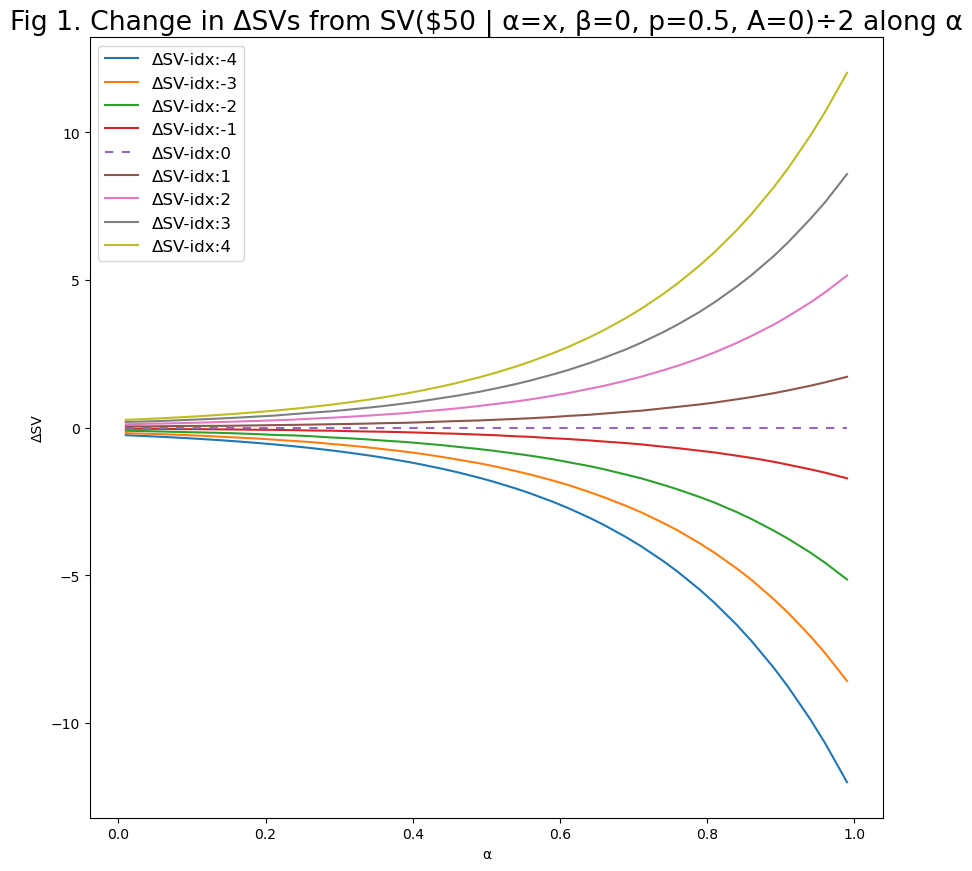

Figure 1. DeltaSV at each value of alpha by trial (ΔSV-idx#). Fig 1 demonstrates that as the value of 
 
alpha decreases, DeltaSV space becomes more compressed. 



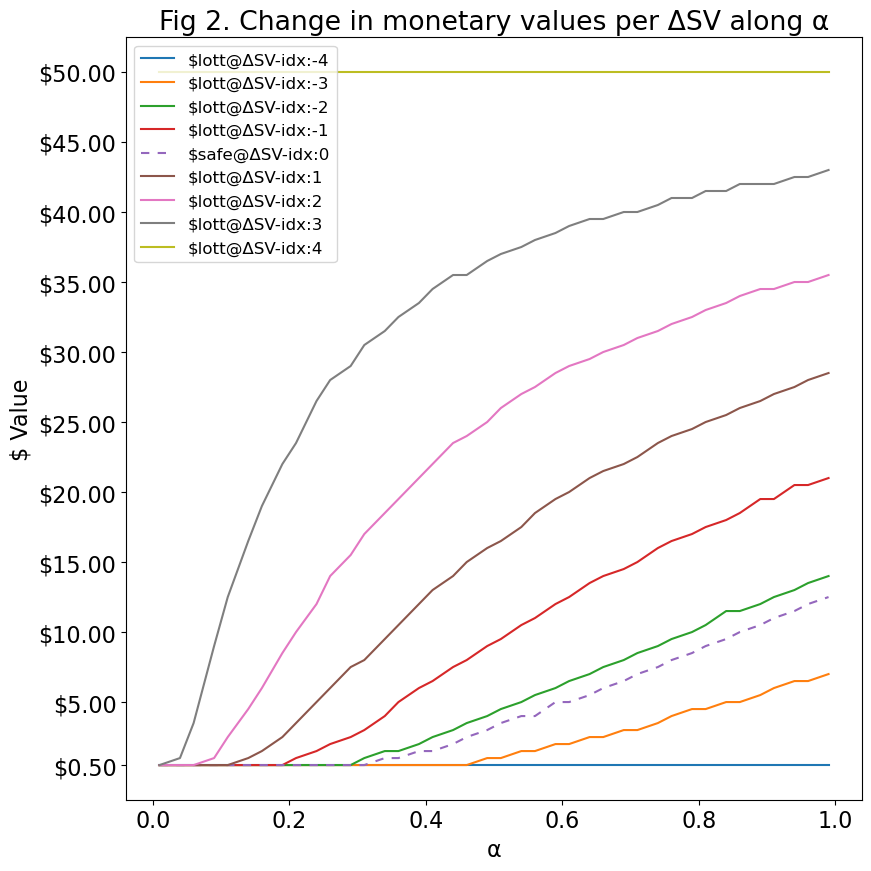

Figure 2 illustrates that (1) as alpha decreases, more DeltaSV values will produce $0.50 for both safe 
 
and lottery options. This is because -with low alpha- the SV_half is so low that any change within this compressed 
 
DeltaSV space will be rounded up to $0.50 when translated into money space (w/ exception of SV_Max). 

As alpha increases past ~0.6, differences in safe and lottery money values become discernible. 

(2) However, even when alpha exceeds 0.6 and beyond, DeltaSV indices -3 and -4 will always produce money values 

for lottery jackpot that are lower than the safe option (beta = 0, ambiguity = 0). 



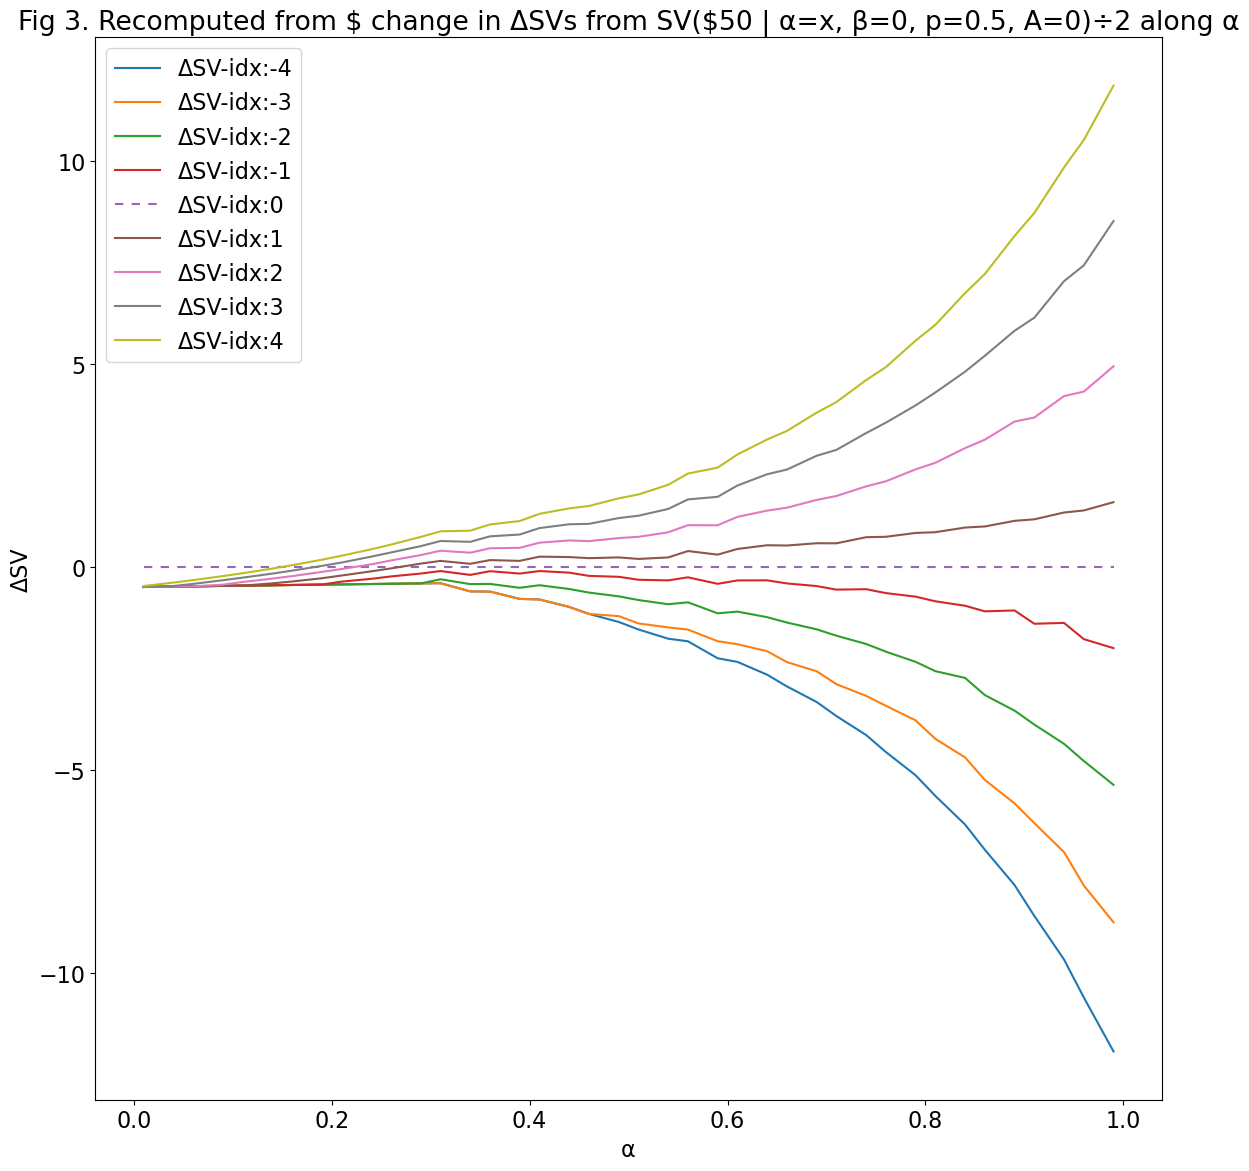

Figure 3 shows that rounding the monetary values to $0.50, while necessary, leads to exacerbated 

problems with low alpha. The true SVs are based on the money values we present per trial. When we recompute 

the DeltaSV from rounded monetary values, unusual things happen. Because of the difference in probability 

value when computing SV for lottery money value compared to safe money value, at low alpha, the lottery 

SV -even for SV_Max- will be lower than the safe SV after monetary rounding. 

*** Figures 1-3 TLDR *** 

*Low alpha --> SV range compression (_alpha's fault_)

*Rounding to $0.50 --> money range compression (_rounding's fault_) 

*Calculating true SV for rounded money --> insanely inflates safe SV relative to initial compressed SV scale 

such that true safe SV (p=1) exceeds SV_Max (p=0.5) (_probability's fault_) 

*Adding beta and ambiguity to the formula as non-zero values magnifies previous issues to new extremes


In [32]:
from matplotlib import pyplot as plt
import numpy as np
# SVs

plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx == 0:
        plt.plot(alphas, np.array(safe_svs_line)-np.array(safe_svs_line), dashes=[4,4], label="ΔSV-idx:"+str(idx))
        idx += 1
    elif idx > 0:
        idx += 1
    #plots SVLott-SVSafe (DeltaSV for each value of alpha)
    plt.plot(alphas, np.array(lot_svs_lines)[i]-np.array(safe_svs_line), label="ΔSV-idx:"+str(idx))
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Fig 1. Change in ΔSVs from SV($50 | α=x, β=0, p=0.5, A=0)÷2 along α")
plt.tight_layout()
plt.savefig("fig1.jpg", bbox_inches='tight')
plt.show()
print("""Figure 1. DeltaSV at each value of alpha by trial (ΔSV-idx#). Fig 1 demonstrates that as the value of \n 
alpha decreases, DeltaSV space becomes more compressed. \n""")


# money
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx == 0:
        plt.plot(alphas, np.array(safe_money_line), dashes=[4,4], label="$safe@ΔSV-idx:"+str(idx))
        idx += 1
    elif idx > 0:
        idx += 1
    plt.plot(alphas, np.array(lot_money_lines)[i], label="$lott@ΔSV-idx:"+str(idx))

plt.rcParams.update({'font.size': 12})
plt.xlabel("α")
plt.ylabel("$ Value")
money = np.arange(0., 50.5, 5)
money[0] = .5
plt.gca().yaxis.set_major_formatter('${x:1.2f}')
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 16})
plt.title("Fig 2. Change in monetary values per ΔSV along α")
plt.tight_layout()
plt.savefig("fig2.jpg", bbox_inches='tight')
plt.show()
print("""Figure 2 illustrates that (1) as alpha decreases, more DeltaSV values will produce $0.50 for both safe \n 
and lottery options. This is because -with low alpha- the SV_half is so low that any change within this compressed \n 
DeltaSV space will be rounded up to $0.50 when translated into money space (w/ exception of SV_Max). \n
As alpha increases past ~0.6, differences in safe and lottery money values become discernible. \n
(2) However, even when alpha exceeds 0.6 and beyond, DeltaSV indices -3 and -4 will always produce money values \n
for lottery jackpot that are lower than the safe option (beta = 0, ambiguity = 0). \n""")


# recomputed SVs
plt.figure(figsize = (12,12))
for i, s in enumerate(space):
    idx = i-4
    if idx == 0:
        plt.plot(alphas, np.array(safe_svs_line_recomp) - np.array(safe_svs_line_recomp), 
                 dashes=[4,4], label="ΔSV-idx:"+str(idx))
        idx += 1
    elif idx > 0:
        idx += 1
    plt.plot(alphas, np.array(lot_svs_lines_recomp)[i] - np.array(safe_svs_line_recomp), 
             label="ΔSV-idx:"+str(idx))

#plt.rcParams.update({'font.size': 14})
plt.legend()
plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Fig 3. Recomputed from \$ change in ΔSVs from SV($50 | α=x, β=0, p=0.5, A=0)÷2 along α")
plt.tight_layout()
plt.savefig("fig3.jpg", bbox_inches='tight')
plt.show()
print("""Figure 3 shows that rounding the monetary values to $0.50, while necessary, leads to exacerbated \n
problems with low alpha. The true SVs are based on the money values we present per trial. When we recompute \n
the DeltaSV from rounded monetary values, unusual things happen. Because of the difference in probability \n
value when computing SV for lottery money value compared to safe money value, at low alpha, the lottery \n
SV -even for SV_Max- will be lower than the safe SV after monetary rounding. \n
*** Figures 1-3 TLDR *** \n
*Low alpha --> SV range compression (_alpha's fault_)\n
*Rounding to $0.50 --> money range compression (_rounding's fault_) \n
*Calculating true SV for rounded money --> insanely inflates safe SV relative to initial compressed SV scale \n
such that true safe SV (p=1) exceeds SV_Max (p=0.5) (_probability's fault_) \n
*Adding beta and ambiguity to the formula as non-zero values magnifies previous issues to new extremes""")

### Retrieving alpha from stored data values
* sv_option = (p - b * amb/2)*(value**alpha)
* When amb == 0, sv_option = (p)*(value**alpha)
* sv_option/p = value**alpha
* alpha = log(sv_option/p)/log(value)




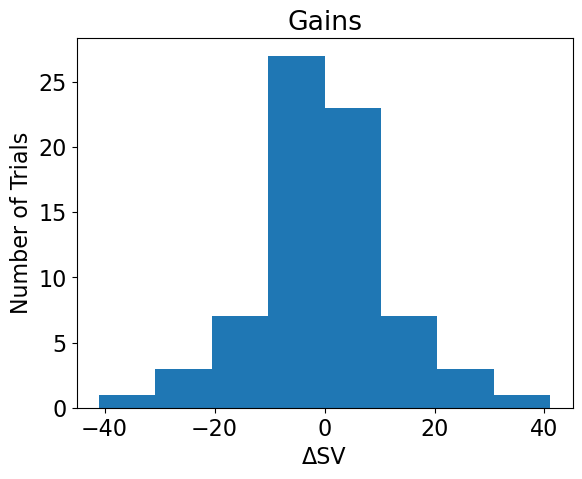

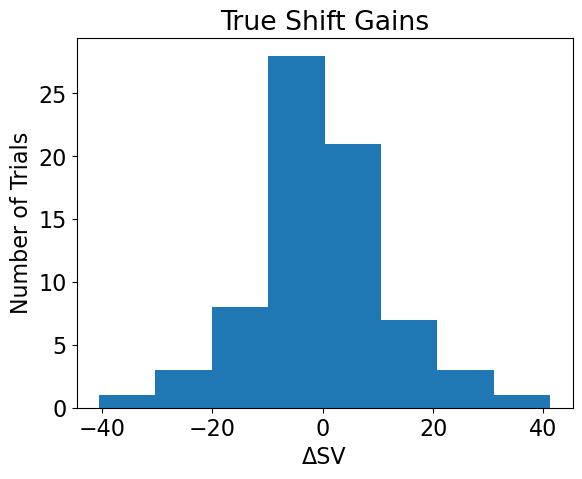

In [33]:
import pylab as plt
import pandas as pd
df = pd.DataFrame(trials)

bins = 8
gain = df.query("crdm_domain == 1")["crdm_delta_sv"].values
plt.hist(gain, bins = bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("Gains")
plt.show()

plt.hist(df.query("crdm_domain == 1")["crdm_true_delta_sv"], bins = bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("True Shift Gains")
plt.show()

In [34]:
from IPython.display import display, HTML
import pandas as pd
df = pd.DataFrame(trials)
display(HTML(df.to_html()))

,crdm_lott_sv,crdm_safe_sv,crdm_lott,crdm_sure_amt,crdm_lott_p,crdm_amb_lev,crdm_delta_sv,crdm_domain,crdm_true_lott_sv,crdm_true_sure_sv,crdm_true_delta_sv,crdm_sv_half,crdm_quad_idx
0,7.106853,0.000000,0.5,5.0,0.13,0.00,-7.106853,1,0.056586,6.898648,-6.842063,7.106853,0
1,7.106853,2.030000,10.0,5.0,0.13,0.00,-5.076853,1,2.060361,6.898648,-4.838287,7.106853,1
2,7.106853,4.060000,17.5,5.0,0.13,0.00,-3.046853,1,4.032636,6.898648,-2.866012,7.106853,2
3,7.106853,6.090000,24.5,5.0,0.13,0.00,-1.016853,1,6.038689,6.898648,-0.859959,7.106853,3
4,7.106853,6.090000,24.5,5.0,0.13,0.00,-1.016853,1,6.038689,6.898648,-0.859959,7.106853,3
5,7.106853,8.120000,31.5,5.0,0.13,0.00,1.013147,1,8.164245,6.898648,1.265596,7.106853,4
6,7.106853,10.150000,38.0,5.0,0.13,0.00,3.043147,1,10.225479,6.898648,3.326831,7.106853,5
7,7.106853,12.180000,44.0,5.0,0.13,0.00,5.073147,1,12.192326,6.898648,5.293678,7.106853,6
8,7.106853,14.213707,50.0,5.0,0.13,0.00,7.106853,1,14.213707,6.898648,7.315059,7.106853,7
9,13.667026,0.000000,0.5,9.0,0.25,0.00,-13.667026,1,0.108819,13.966610,-13.857791,13.667026,0


Alpha: 0.3
Beta: 1.28


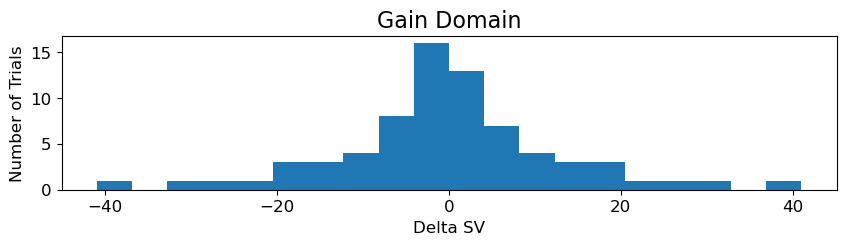

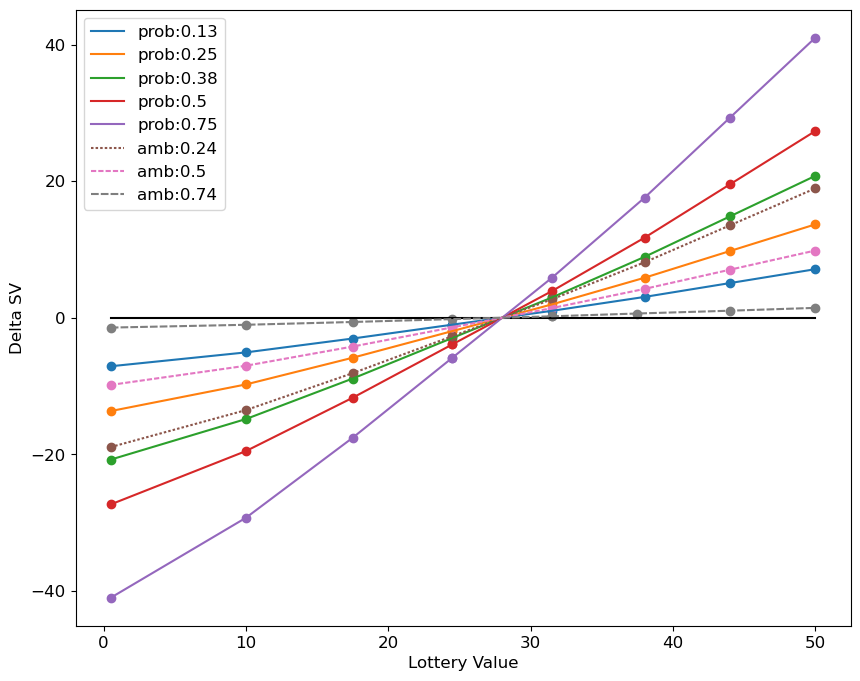

In [35]:
import pandas as pd
import numpy as np
import pylab as plt
df = pd.DataFrame(trials)

bins = 20
plt.figure(figsize=(10,2))
plt.rcParams.update({'font.size': 12})
gain = df.query("crdm_domain == 1")["crdm_delta_sv"].values
plt.hist(gain, bins=bins)
plt.ylabel("Number of Trials")
plt.xlabel("Delta SV")
plt.title("Gain Domain", fontsize=16)
print("Alpha: 0.3")
print("Beta: 1.28")
plt.show()

df = pd.DataFrame(trials)
gain = df.query("crdm_domain == 1")
plt.figure(figsize=(10,8))
plt.plot([0.5,50], [0,0], color="black")
prob_trials = gain.query("crdm_amb_lev == 0")
prob = np.unique(prob_trials["crdm_lott_p"].values)

for p in prob:
    trial_set = prob_trials.query("crdm_lott_p == @p")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sv = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sv[idx], label="prob:"+str(p))
    plt.scatter(money[idx], sv[idx])
amb_trials = gain.query("crdm_amb_lev != 0")
amb = np.unique(amb_trials["crdm_amb_lev"].values)
for a in amb:
    trial_set = amb_trials.query("crdm_amb_lev == @a")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sv = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sv[idx], label="amb:"+str(a), dashes=[5*a,1])
    plt.scatter(money[idx], sv[idx])
plt.xlabel("Lottery Value", fontsize=12)
plt.ylabel("Delta SV", fontsize=12)
plt.legend()
plt.show()